# **Review on N-HiTS**
- thorough mathematical basis and code from scratch

## **기존 모델의 문제를 해결한 N-HiTS)**

1. 불안정한 예측 문제
2. 보간(hierarchial interpolation)과 다중주기 데이터 추출(multi-rate data sampling)으로 연산 복잡성 해결

### **구조)**
- $\theta$ + MLP layer(다층 퍼셉트론) + MaxPool layer -> Blocks -> Stacks -> N-HiTS architecture

- 기존 Transformer 기반 모델(architecture)보다 25% 정도 성능이 앞선다.

- 참고 github repo: https://github.com/cchallu/n-hits

### **기존 딥러닝 시계열 모델들의 특징)**
1. Attention 기반: 성능은 좋지만 연산 비용이 높다


2. 완전 연결 신경망(fully connected Stacks or Neural Nets): MLP의 확장된 버전 마찬가지로 연산 비용이 높다  


3. RNN(순환신경망)
- 이전 단계의 output이 다음 단계의 input이 되는 모델. 시계열에 적합한 형태.
- Multistep Prediction Strategy (다중 단계 예측 전략): 순차적인 데이터에 대한 예측을 반복적으로 수행함으로써 긴 시간 범위 예측을 수행
- Single Forward Pass (단일 전방 패스): FeedForwardnetwork(FFW), 입력층에서 출력층까지 한 방향으로 이동한다.

#### **결론)**
연산 비용과 예측 불안정성은 문제가 존재

Fast Fourier Transformer를 사용하는 Autoformer를 포함한 하단의 Attention 기반 모델들과 비교해서 N-HiTS가 다변수 시게열 데이터에 대해 25% 정확도 향상을 보였다.

Attention 기반 sparse, local, local sensitive 모델들: https://rezayazdanfar.medium.com/everything-about-attention-family-644747903c60

Autoformer 모델: https://itnext.io/autoformer-decomposition-transformers-with-auto-correlation-for-long-term-series-forecasting-8f5a8b115430


# NHiTS 의 구조

`N-BEATS`를 기반으로 재정의한 모델이다.
  
하단은 **N-BEATS**의 구조:

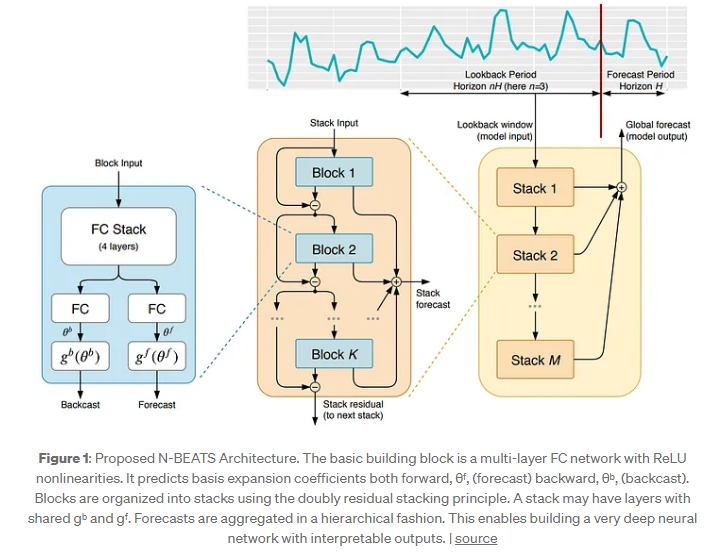


**N-BEATS의 주요 특징)**

계층 구조(hierarchial)를 통해 해석가능한 output을 반환하는 'deep' neural network 을 만드는 것이 가능하다.

**N-HiTS**의 구조:

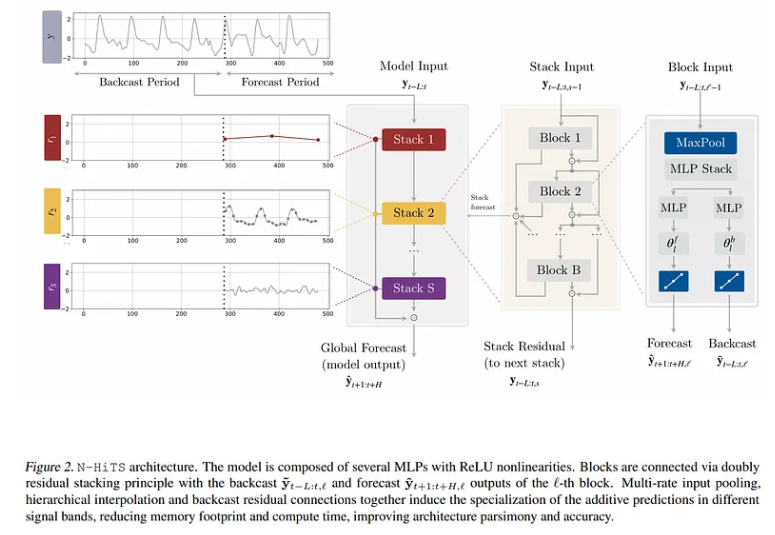

직접 코드를 검색하면서 각 블록의 의미를 파악하자

In [ ]:
# NHITS code from scratch

class _NHITS(nn.Module):
    """
    N-HiTS Model
    """

    def __init__(self, n_time_in,n_time_out,n_s,n_x,n_s_hidden,n_x_hidden,
                 stack_types: list, n_blocks: list, n_layers: list, n_theta_hidden: list,
                 n_pool_kernel_size: list, n_freq_downsample: list, pooling_mode, interpolation_mode, dropout_prob_theta,
                 activation, initialization, batch_normalization, shared_weights):

        # nn.Module 부모 클래스를 가져온다
        super().__init__()

        # 출력의 예측 시계열의 길이를 저장
        self.n_time_out = n_time_out

        # create_stack라는 메서드를 통해서 block들을 생성하고 저장한다.

        blocks = self.create_stack(stack_types=stack_types,
                                   n_blocks=n_blocks, n_time_in = n_time_in, n_time_out=n_time_out, n_x=n_x,
                                   n_x_hidden=n_x_hidden, n_s=n_s, n_s_hidden=n_s_hidden,
                                   n_layers=n_layers, n_theta_hidden=n_theta_hidden, n_pool_kernel_size=n_pool_kernel_size,
                                   n_freq_downsample=n_freq_downsample, pooling_mode=pooling_mode,
                                   interpolation_mode=interpolation_mode, batch_normalization=batch_normalization,
                                   dropout_prob_theta=dropout_prob_theta,activation=activation,
                                   shared_weights=shared_weights, initialization=initializiation)

        self.blocks = t.nn.ModuleList(blocks)


    # 위에서 block 생성에 사용되는 메서드 정의
    def create_stack(self, stack_types, n_blocks, n_time_in, n_time_out,
                     n_x, n_x_hidden. n_s, n_s_hidden, n_layers, n_theta_hidden,
                     n_pool_kernel_size, n_freq_downsample, pooling_mode, interpolation_mode,
                     batch_normalization, dropout_prob_theta,
                     activation, shared_weights, initialization):

        block_list = []


        # stack_types의 길이만큼 반복,
        # block list에 추가한다
        for i in range(len(stack_types)):

            # stack을 확인할 수 있는 코드?
            # print(f'| -- Stack {stack_types[i]} (#{i})')

            for block_id in range(n_blocks[i]):

                # 각 블록의 batch normalization이 첫 블록에만 적용된다.
                if (len(block_list)==0) and (batch_normalization):
                    batch_normalization_block = True
                else:
                    batch_normalization_block = False

                # 공유 가중치 (shared weights)가 존재한다면 이전 블록을 재사용한다.
                if shared_weights and block_id>0:
                    n_beats_block = block_list[-1]

                else:
                    # block type은 `identity`여야 한다, 기저함수 IdentityBasis를 블록에 포함.
                    if stack_types[i] == 'identity':
                         n_theta = (n_time_in + max(n_time_out//n_freq_downsample[i], 1))
                         basis = IdentityBasis(backcast-size = n_time_in,
                                               forecast_size=n_time_out,
                                               interpolation_mode=interpolation_mode)
                    else:
                        # 오류를 출력할 조건문과 문구
                        assert 1 < 0, f'Block type not found!'

                    # `_NHITSBlock`을 생성하고 초기화 함수를 적용한다
                    nbeats_block = _NHITSBlock(n_time_in=n_time_in,n_time_out=mn_time_out,n_x=n_x, n_s=n_s, n_s_hidden=n_s_hidden,
                                               n_theta=n_theta, n_theta_hidden=n_theta_hidden[i], n_pool_kernel_size=n_pool_kernel_size[i],
                                               pooling_mode=pooling_mode,
                                               basis=basis, n_layers=n_layers[i], batch_normalization=batch_normalization_block,
                                               drop_out_prob=dropout_prob_theta,
                                               activation=activation)

                init_function = partial(init_weights, initialization=initialization)
                n_beats_block.layers.apply(init_function)
                #print(f'      | -- {nbeats_block}')
                block_list.append(nbeats_block)
        return block_list

    # 순전파
    def forward(self, S: t.Tensor, Y: t.Tensor, X: t.Tensor,
                insample_mask: t.Tensor, outsample_mask: t.Tensor,
                return_decomposition: bool=False):

        # 입력 시계열 데이터의 일부 추축

        # 학습할 과거데이터
        insample_y = Y[:, :-self.n_time_out]

        # 상단의 과거데이터의 특징 데이터
        # 3차원 배열이다, step 마다 시계열의 특징(feature)을 포함하고 있따.
        insample_x_t = X[:, :, :-self.n_time_out]

        # 유효한 데이터 포인트를 지정한다. masking으로 무의미한 데이터를 가린다.
        insample_mask = insample_mask[:, :-self.n_time_out]

        # 출력 시계열 데이터의 일부 추출
        # 모델이 예측해야하는 미래 데이터에 해당한다.
        outsample_y = Y[:, -self.n_timeout:]
        outsample_x_t = X[:, :, -self.n_time_out:]
        outsample_mask = outsample_mask[:, -self.n_time_out:]

        # decomposition 여부에 따라 하단이 실행된다
        if return_decomposition:
            forecast, block_forecasts = self.forecast_decomposition(insample_y=insample_y, insample_x_t=insample_x_t,
                                                                    insample_mask=insample_mask, outsample_x_t=outsample_x_t,
                                                                    x_s=S)

            return outsample_y, forecast, bockj_forecasts, outsample_mask

        # decomposition이 아니면 forecast를 수행한다
        else:
            forecast = self.forecast(insample_y=insample_y,
                                     insample_x_t=insample_x_t,
                                     insample_mask=insample_mask,
                                     outsample_x_t=outsample_x_t,
                                     x_s=S)

            return outsample_y, forecast, outsample_mask

    # 위에서 사용되는 forecast과 forecast_decomposition를 정의한다
    def forecast(self, insample_y: t.Tensor, insample_x_t: t.Tensor, insample_mask: t.Tensor,
                 outsample_x_t: t.Tensor, x_s: t.Tensor):

        # `insample_y`를 시간축을 기준으로 뒤집는다. N-BEATS 모델에서 잔차계산을 위해 뒤쪽부터 데이터를 처리한다.
        # 나머지 데이터도 이에 맞춰 뒤집는다.
        residuals = insample_y.flip(dims=(-1,))
        insample_x_t = insample_x_t.flip(dims=(-1,))
        insample_mask = insample_mask.flip(dims=(-1,))

        # 마지막 값이 예측의 초기값으로 설정된다. 모델의 첫번째 예측 값으로 사용된다.
        forecast = insample_y[:, -1:]
        for i, block in enumerate(self.blocks):

            # 블록이 잔차와 특징데이터를 받아서 backcast와 block_forecast를 생성한다.
            # backcast: 입력데이터를 재구성하여 중요한 패턴을 캐치한다.
            # 일종의 해석에 초점을 맞춘 encoder 기반 BERT 느낌이라고 할 수 있다.
            # `block` 메서드는 `forward` 메서드를 호출하는 것이다.'
            # 입력 데이터 재구성(분석) 용 `backcast`와 예측값 `forecast`를 생성한다.
            backcast, block_forecast = block(insample_y=residuals, insample_x_t=insample_x_t,
                                             outsample_x_t=outsample_x_t, x_s=x_s)
            residuals = (residuals - backcast) * insample_mask
            forecast = forecast + block_forecast

        return forecast

    def forecast_decomposition(self, insample_y: t.Tensor, insample_x_t: t.Tensor, insample_mask = t.Tensor,
                               outsample_x_t: t.Tensor, x_s: t.Tensor):

        residuals = insample_y.flip(dims=(-1,))
        insample_x_t = insample_x_t.flip(dims=(-1,))
        insample_mask = insample_mask.flip(dims=(-1)),

        n_batch, n_channes, n_t = outsample_x_t.size(0), outsample_x_t.size(1), outsample_x_t.size(2)

        # Level with Naive1
        level = insample_y[:, -1:]
        block_forecasts = [level.repeat(1, n_t)]

        forecast = level
        for i, block in enumerate(self.blocks):
            backcast, block_forecast = block(insample_y=residuals, insample_x_t=insample_x_t,
                                             outsample_x_t=outsample_x_t, x_s=x_s)
            residuals = (residuals - backcast) * insample_mask
            forecast = forecast + block_forecast
            block_forecasts.append(block_forecast)

        # (n_batch, n_blocks, n_t)
        block_forecasts = t.stack(block_forecasts)
        block_forecasts = block_forecasts.permute(1,0,2)

        return forecast, block_forecasts

### 필요한 부분 코드 추가 설명

1. **블록 생성**
- create_stack를 보면 nbeats 방법론을 기반으로 블록을 생성하고 있다는 것을 알 수 있다.
-  `stack_types`에 따라 block sequence를 생성한다. N-BEATS에서 각 블록은 입력 시계열을 더 간단한 구성요소, 추세(trend), 계절성(seasonality) 와 같은 시계열의 필수적 특징으로 분해한다.

2. **기저함수(Basis Function)**
- N-BEATS에서 각 블록은 basis function을 포함한다.
- `stack_types[i] == identity`일 때 `IdentityBasis`를 사용한다.

3. **잔차 연결 (Residual Connection)**
- `forecast` 메서드는 블록의 backcast를 residuals에서 빼고, block이 예측한 값을 forecast에 더하는 '잔차 연결' 메커니즘을 사용
- 시계열의 다른 축면에 집중할 수 있게 해서 전체 예측 정확도 향상

4. **분해(Decomposition)**
- `forecast_decomposition`  전체 예측값과 각 block의 기여도를 반환. N-BEATS도 이와 유사하게 예측을 구성요소로 분해하여 해석가능성을 제공한다.

#### 적용)

1. **블록생성**
- `create_stack` 메서드로 block들로 이루어진 list 생성. `stack_types[i]`가 각 블록이다.
- `shared_weights` 파라미터로 블록들이 가중치를 공유할 수 있다.

2. **기저 함수(Basis Function)**
- N-BEATS의 핵심. 여기서는 `IdentityBasis`를 사용하지만, 다른 기저함수도 사용가능.
- Basis Function이 어떻게 input time series이 분해될 방식을 정한다.

3. **잔차 연결(Residual Connection)**
`forecast`는 input time series를 block들로 반복적으로 분해한다.
- 처음 입력되는 뒤집힌(flip) input time series, `insample_y`가 잔차로 설정된다.
- 각 block에서 `residuals`를 입력으로 받아 `backcast`와 `block_forecast`를 생성한다
- `residuals`는 `(residuals - backcast) * insample_mask`로 업데이트된다.
- `forecast`는 `forecast + black_forecast`로 업데이트 된다.

입력 시계열을 뒤집는(flip) 이유: 최근 데이터부터 우선하여 반영할 수 있다. 최신 데이터를 먼저 고려하고 잔차를 점진적으로 줄여가면서 예측의 정확도를 높인다.  

### 다시 NHiTS 추가 설명
- NHiTS는 N-BEATS에 비해 더 정확한 예측을 더 낮은 연산 비용으로 수행.
- 장기 추정(forecasting long-dependcies)를 할 때 더 효과적이다.

**2가지 기법)**
- 다중 주기 추출 기법(multi-rate sampling) 기법을 (sub-sampling layers)로 구현한다.  

*다중 스케일 합성(multi-scale synthesis)*  

계층 구조(hierarchial structure): 상위 스케일에서 거시적인 특징, 하위 스케일에서 미시적인 특징을 잡는다.

정확도는 상승, 요구 되는 연산량은 매우 줄었다.

- 비국소적이고(non-local) 데이터의 국소성도 간과하는 Transformer 기반 아키텍쳐와 달리, N-BEATS는 데이터의 특정 부분이나 구간에 대해 기저함수 (basis function)으로 비선형 변환을 수행한다.

# Block

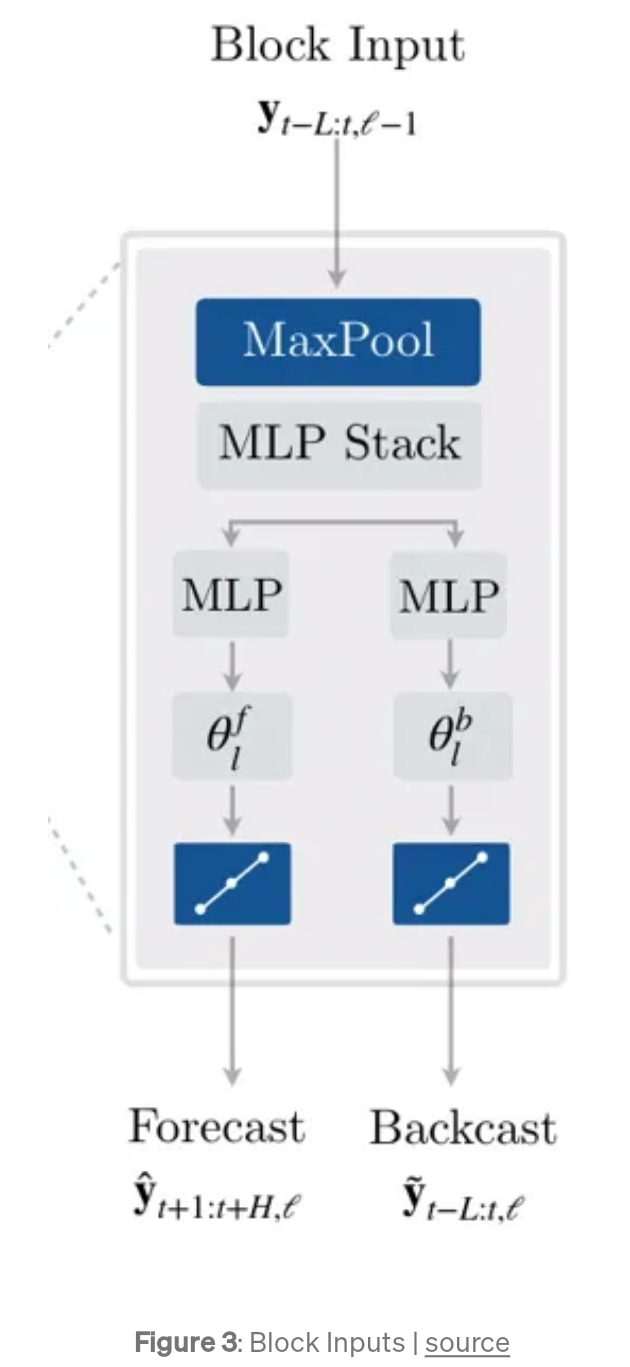

- 상단 이미지를 참고하면, MLP layer가 forecast와 backcast output들을 위한 가중치를 생성하는 것을 알 수 있다.

- MLP도 FFW 의 한 종류이다.

- $\theta$: basis function, 각 계층에서 시계열 데이터가 어떻게 분해되고 재구축될지를 정의한다.

- 3개의 연결된 점들: 결과에 따라 선택된 time series data points

In [ ]:
class _NHITSBlock(nn.Module):
    """
    N-HiTS block, basis function을 argument로 받는다
    """
    def __init__(self, n_time_in: int, n_time_out: int, n_x: int,
                 n_s: int, n_s_hidden: int, n_theta: int, n_theta_hidden: list,
                 n_pool_kernel_size: int, pooling_mode: str, basis: nn.Module,
                 n_layers: int, batch_normalization: bool, dropout_prob: float, activation: str):
        super().__init__()

        # max pool, 단위 당 최대값
        assert (pooling_mode in ['max', 'average'])
        n_time_in_pooled = int(np.ceil(n_time_int/n_pool_kernel_size))

        if n_s == 0:
            n_s_hidden = 0
        n_theta_hidden = [n_time_in_pooled + (n_time_in+n_time_out)*n_x + n_s_hidden] + n_theta_hidden

        self.n_time_in = n_time_in
        self.n_time_out = n_time_out
        self.n_s = n_s
        self.n_s_hidden = n_s_hidden
        self.n_x = n_x
        self.n_pool_kernel_size = n_pool_kernel_size
        self.batch_normalization = batch_normalization
        self.dropout_prob = dropout_prob

        assert activation in ACTIVATIONS, f'{activation} is not in {ACTIVATIONS}'
        activ = getattr(nn, activation)()

        if pooling_mode == 'max':
            self.pooling_layer = nn.MaxPool1d(kernel_sze = self.n_pool_kernel_size, stride=self.n_pool_kernel_size, ceil_mode=True)
        elif pooling_mode == 'average':
            self.pooling_layer = nn.AvgPool1d(kernel_size=self.n_pool_kernel_size, stride=self.n_pool_kernel_size, ceil_mode = True)

        hidden_layers = []
        for i in range(n_layers):
            hidden_layers.append(nn.Linear(in_features=n_theta_hidden[i], out_features=n_theta_hidden[i+1]))
            hidden_layers.append9activ)

            if self.batch_normalization:
                hidden_layers.append(nn.BatchNorm1d(num_features=n_theta_hidden[i+1]))

            if self.dropout_prob>0:
                hidden_layers.append(nn.Dropout(p=self.dropout_prob))

        output_layer = [nn.Linear(in_features=n_theta_hidden[-1], out_features=n_theta)]
        layers = hidden_layers + output_layer

        # n_s is computed with data, n_s_hidden is provided by user, if 0 no statics are used
        if (self.n_s>0) and (self.n_s_hidden > 0)
            self.static_encoder = _StaticFeaturesEncoder(in_features=n_s, out_features=n_s_hidden)
        self.layers = nn.Sequential(*layers)
        self.basis = basis

    def forward(self, insample_y: t.Tensor, insample_x_t: t.Tensor,
                outsample_x_t: t.Tensor, x_s: t.Tensor) -> Tuple[t.Tensor, t.Tensor]:
        insample_y = insample_y.unsqueeze(1)
        # Pooling layer to downsample input
        insample_y = self.pooling_layer(insample_y)
        insample_y = insample_y.squeeze(1)

        batch_size = len(insample_y)
        if self.n_x > 0:
            insample_y = t.cat((insample_y, insample_x_t.reshape(batch_size, -1)), 1)
            insample_y = t.cat((insample_y, outsample_x_t,reshape(batch_size, -1)), 1)

        # Static exogenous
        if (self.n_s > 0) and (self.n_s_hidden >0):
            x_s = self.static_encoder(x_s)
            insample_y = t.cat((insample_y), x_s), 1)

        # Compute local projection weights and projection
        theta = self.layers(insample_y)
        backcast, forecast = self.basis(theta, insample_x_t, outsample_x_t)

        return backcast, forecast

상단의 block들이 모여서 stack을 만들어낸다. 각 block 들이 가지고 있는 basis function을 통해 data의 다양한 특징을 학습한다.

In [ ]:
def create_stack(self, stact_types, n_blocks,
                 n_time_in, n_time_out,
                 n_x, n_x_hidden, n_s, n_s_hidden,
                 n_layers, n_theta_hidden,
                 n_pool_kernel_size, n_freq_downsample, pooling_mode,
                 batch_normalization, dropout_prob_theta,
                 activation, shared_weights, initialization):

        block_list = []

        for i in range(len(stack_types)):
            #print(f'| -- Stack {stack_types[i]} (#{i})')
            for block_id in range(n_blocks[i]):

                #batch norm only first block
                # input data 가 raw data이므로 학습에 유리하도록 정규화를 시켜준다.
                if (len(block_list)==0) and (batch_normalization):
                    batch_normalization_block = True
                else:
                    batch_normalization_block = False

                # shared weights
                # 언제 가중치가 공유될까?
                if shared_weights and block_id>0:
                    nbeats_block = block_list[-1]
                else:
                    if stack_types[i] == 'identity':
                        n_theta = (n_time_in + max(n_time_out//n_freq_downsample[i], 1))
                        basis = IdentityBasis(backcast_size=n_time_in,
                                              forecast_size=n_time_out,
                                              interpolation_mode=interpolation_mode)

                    else:
                        assert 1<0, f'Block type not found!'

                    nbeats_block = _NHITSBlock(n_time_in=n_time_in,
                                                  n_time_out=n_time_out,
                                                  n_x=n_x,
                                                  n_s=n_s,
                                                  n_s_hidden=n_s_hidden,
                                                  n_theta=n_theta,
                                                  n_theta_hidden=n_theta_hidden[i],
                                                  n_pool_kernel_size=n_kernel_size[i],
                                                  pooling_mode=pooling_mode,
                                                  basis=basis,
                                                  n_layers=n_layers[i],
                                                  batch_normalization=batch_normalization_block,
                                                  dropout_prob=drop_out_prob_theta,
                                                  activation=activation)

            # evaluation 방법을 선택해서 모든 블록에 적용
            init_function = partial(init_weights, initialization=initialization)
            nbeats_block.layers.apply(init_function)
            # print(f'     | -- {nbeats_block}')
            block_list.append(nbeats_block)
     return block_list


# NHiTS 특징 종합)

## 1. Multi-Rate Signal Sampling:

input data 가 stack에 들어가면 block의 가장 위에 있는 `MaxPool` layer를 가장 먼저 통과하는 것을 알 수 있다.

분석할 단위를 다르게 설정한다.

MaxPool의 kernel size가 클수록 더 작은 단위로 쪼갠다.

MaxPool을 데이터가 통과하고 나면, 각 블록들의 `MLP`는 다양한 시간 단위로 추출된 input 데이터를 받게 된다.

더 큰 kernel size일 수록 더 장기적인 시간 단위에 집중하게 된다. 예측의 안정성이 올라간다.

Pooling을 적용함으로써 input의 길이도 줄어들게 되고, 파라미터도 줄어듦으로써 파라미터도 줄어들게 된다.

하단은 `MaxPool' 공식:

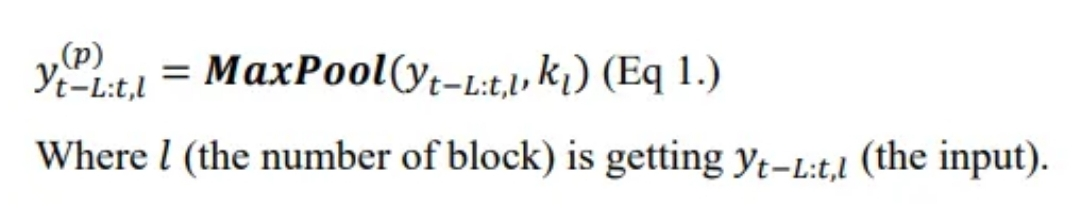

## 2. Non-Linear Regression

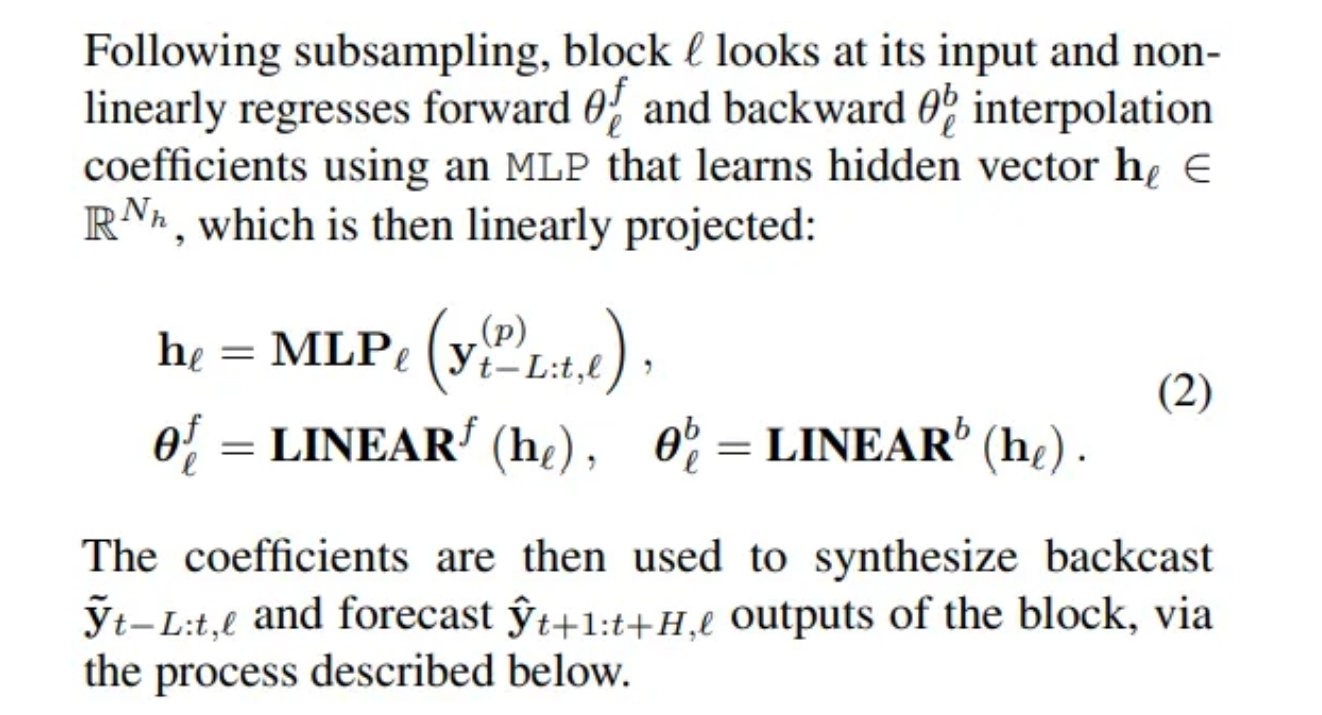

### 원본 논문 한국어 번역

#### 내용 요약

텍스트는 모델의 블록 $ \ell $ 이 입력을 받아 비선형적으로 회귀 분석을 수행하여 전방 $ \theta_{\ell}^f $ 및 후방 $ \theta_{\ell}^b $ 보간 계수를 계산하는 과정을 설명합니다. 이를 위해 다층 퍼셉트론(MLP)을 사용하여 숨겨진 벡터 $ \mathbf{h}_{\ell} \in \mathbb{R}^{N_h} $ 를 학습한 후, 이 벡터를 선형적으로 투영합니다.

#### 세부 설명

1. **서브샘플링 이후**:
   블록 $ \ell $ 은 입력 데이터를 받아들이고, 이를 통해 전방 및 후방 보간 계수를 비선형적으로 회귀 분석합니다.

2. **MLP를 사용한 숨겨진 벡터 학습**:
   블록 $ \ell $ 은 $ MLP_{\ell} $ 을 사용하여 숨겨진 벡터 $ \mathbf{h}_{\ell} $ 를 학습합니다. 여기서 $ MLP $ 는 다층 퍼셉트론으로, 입력 데이터 $ \mathbf{y}_{t-L:t,\ell}^{(p)} $ 를 받아들입니다.
   
   $$
   \mathbf{h}_{\ell} = MLP_{\ell} \left( \mathbf{y}_{t-L:t,\ell}^{(p)} \right)
   $$

3. **선형 투영**:
   학습된 숨겨진 벡터 $ \mathbf{h}_{\ell} $ 는 전방 및 후방 보간 계수를 계산하기 위해 각각 선형 투영됩니다.

   $$
   \theta_{\ell}^f = LINEAR^f (\mathbf{h}_{\ell}), \quad \theta_{\ell}^b = LINEAR^b (\mathbf{h}_{\ell})
   $$

4. **보간 계수 사용**:
   계산된 보간 계수는 블록의 백캐스트 $ \mathbf{\tilde{y}}_{t-L:t,\ell} $ 및 포캐스트 $ \mathbf{\hat{y}}_{t+1:t+H,\ell} $ 출력을 합성하는 데 사용됩니다.

텍스트는 기본적으로 데이터의 서브샘플링, MLP를 통한 숨겨진 벡터 학습, 그리고 선형 투영을 통해 보간 계수를 계산하고 이를 예측에 사용하는 과정을 설명하고 있습니다.

현재의 데이터를 기준으로 미래 뿐만 아니라 과거도 예측(해석)한다.

해석력을 높여주는 BERT의 Bidirectional Context와 유사한 방식?

# 예시 데이터 및 수식

다음은 NHITS 모델의 블록이 전방 및 후방 보간 계수를 사용하여 과거와 미래를 예측하는 과정을 실제 예시 데이터와 함께 설명한 것입니다.

#### 예시 데이터

- **현재 시점 $ t $**
- **과거 $ L $ 기간**: $y_{t-4}, y_{t-3}, y_{t-2}, y_{t-1}, y_t$ (총 5개의 데이터 포인트)
- **미래 $ H $ 기간**: $y_{t+1}, y_{t+2}, y_{t+3}$ (총 3개의 데이터 포인트)

#### 단계별 설명

1. **서브샘플링 이후**:
   블록 $ \ell $은 입력 데이터를 받아들이고, 이를 통해 전방 및 후방 보간 계수를 비선형적으로 회귀 분석합니다. 입력 데이터는 과거 $ L $ 기간의 데이터입니다.
   
   예시 입력 데이터:
   $$
   \mathbf{y}_{t-4:t} = [y_{t-4}, y_{t-3}, y_{t-2}, y_{t-1}, y_t] = [1, 2, 3, 4, 5]
   $$

2. **MLP를 사용한 숨겨진 벡터 학습**:
   블록 $ \ell $은 MLP를 사용하여 숨겨진 벡터 $ \mathbf{h}_{\ell} $를 학습합니다. 이 벡터는 입력 데이터로부터 학습된 특징 벡터입니다.
   
   $$
   \mathbf{h}_{\ell} = MLP_{\ell} \left( \mathbf{y}_{t-4:t} \right)
   $$

   여기서, MLP는 간단한 예를 위해 다음과 같이 정의될 수 있습니다:
   - 입력층: 5개의 뉴런 (입력 데이터의 길이)
   - 은닉층: 3개의 뉴런 (임의로 설정)
   - 출력층: 3개의 뉴런 (숨겨진 벡터의 길이)

   은닉층과 출력층의 가중치와 편향을 임의로 설정하여 예시 계산을 진행하겠습니다.

   $$
   W_{hidden} = \begin{bmatrix}
   0.1 & 0.2 & 0.3 & 0.4 & 0.5 \\
   0.6 & 0.7 & 0.8 & 0.9 & 1.0 \\
   1.1 & 1.2 & 1.3 & 1.4 & 1.5 \\
   \end{bmatrix}, \quad b_{hidden} = \begin{bmatrix} 0.1 \\ 0.1 \\ 0.1 \end{bmatrix}
   $$

   $$
   W_{output} = \begin{bmatrix}
   0.1 & 0.2 & 0.3 \\
   0.4 & 0.5 & 0.6 \\
   0.7 & 0.8 & 0.9
   \end{bmatrix}, \quad b_{output} = \begin{bmatrix} 0.1 \\ 0.1 \\ 0.1 \end{bmatrix}
   $$

   **은닉층 계산**:
   $$
   h_{hidden} = \text{ReLU} (W_{hidden} \cdot \mathbf{y}_{t-4:t} + b_{hidden})
   $$

   $$
   h_{hidden} = \text{ReLU} \left( \begin{bmatrix}   0.1 & 0.2 & 0.3 & 0.4 & 0.5 \\
   0.6 & 0.7 & 0.8 & 0.9 & 1.0 \\
   1.1 & 1.2 & 1.3 & 1.4 & 1.5 \\
   \end{bmatrix} \cdot \begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \\ 5 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \\ 0.1 \end{bmatrix} \right)
   $$

   $$
   h_{hidden} = \text{ReLU} \left( \begin{bmatrix} 5.5 \\ 14.5 \\ 23.5 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \\ 0.1 \end{bmatrix} \right) = \text{ReLU} \left( \begin{bmatrix} 5.6 \\ 14.6 \\ 23.6 \end{bmatrix} \right)
   $$

   (ReLU 함수는 음수를 0으로 바꾸고, 양수는 그대로 둡니다.)

   **출력층 계산**:
   $$
   \mathbf{h}_{\ell} = W_{output} \cdot h_{hidden} + b_{output}
   $$

   $$
   \mathbf{h}_{\ell} = \begin{bmatrix}
   0.1 & 0.2 & 0.3 \\
   0.4 & 0.5 & 0.6 \\
   0.7 & 0.8 & 0.9
   \end{bmatrix} \cdot \begin{bmatrix} 5.6 \\ 14.6 \\ 23.6 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \\ 0.1 \end{bmatrix}
   $$

   $$
   \mathbf{h}_{\ell} = \begin{bmatrix}
   (0.1 \cdot 5.6) + (0.2 \cdot 14.6) + (0.3 \cdot 23.6) \\
   (0.4 \cdot 5.6) + (0.5 \cdot 14.6) + (0.6 \cdot 23.6) \\
   (0.7 \cdot 5.6) + (0.8 \cdot 14.6) + (0.9 \cdot 23.6)
   \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \\ 0.1 \end{bmatrix}
   $$

   $$
   \mathbf{h}_{\ell} = \begin{bmatrix}
   11.46 \\
   26.56 \\
   41.66
   \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \\ 0.1 \end{bmatrix} = \begin{bmatrix} 11.56 \\ 26.66 \\ 41.76 \end{bmatrix}
   $$

3. **선형 투영**:
   학습된 숨겨진 벡터 $ \mathbf{h}_{\ell} $는 전방 및 후방 보간 계수를 계산하기 위해 각각 선형 투영됩니다.
   
   전방 보간 계수:
   $$
   \theta_{\ell}^f = \text{LINEAR}^f (\mathbf{h}_{\ell})
   $$

   후방 보간 계수:
   $$
   \theta_{\ell}^b = \text{LINEAR}^b (\mathbf{h}_{\ell})
   $$

   예시로 선형 투영을 간단히 하기 위해 행렬과 벡터 곱셈을 사용합니다.

   전방 보간 계수:
   $$
   \theta_{\ell}^f = \begin{bmatrix} 0.1 & 0.2 & 0.3 \end{bmatrix} \cdot \begin{bmatrix} 11.56 \\ 26.66 \\ 41.76 \end{bmatrix}
   $$

   $$
   \theta_{\ell}^f = (0.1 \cdot 11.56) + (0.2 \cdot 26.66) + (0.3 \cdot 41.76) = 1.156 + 5.332 + 12.528 = 19.016
   $$

   후방 보간 계수:
   $$
   \theta_{\ell}^b = \begin{bmatrix} 0.4 & 0.5 & 0.6 \end{bmatrix} \cdot \begin{bmatrix} 11.56 \\ 26.66 \\ 41.76 \end{bmatrix}
   $$

   $$
   \theta_{\ell}^b = (0.4 \cdot 11.56) + (0.5 \cdot 26.66) + (0.6 \cdot 41.76) = 4.624 + 13.33 + 25.056 = 43.01
   $$

4. **보간 계수 사용**:
   계산된 보간 계수는 블록의 백캐스트(과거 복원)와 포캐스트(미래 예측) 출력을 합성하는 데 사용됩니다.
   
   백캐스트 출력(과거 데이터 복원):
   $$
   \mathbf{\tilde{y}}_{t-4:t} = \text{Backcast Function} (\theta_{\ell}^b)
   $$

   포캐스트 출력(미래 데이터 예측):
   $$
   \mathbf{\hat{y}}_{t+1:t+3} = \text{Forecast Function} (\theta_{\ell}^f)
   $$

### 요약

이 예시에서는 모델이 과거 데이터를 복원하고 미래 데이터를 예측하는 과정을 보여줍니다. 전방 보간 계수는 미래 데이터를 예측하는 데 사용되며, 후방 보간 계수는 과거 데이터를 복원하는 데 사용됩니다. 이 과정을 통해 모델은 현재 시점을 기준으로 과거와 미래의 데이터를 모두 다룰 수 있습니다.

참고로, 은닉층의 가중치를 전후방 모두에 적용하는 것을 알 수 있다.

## 3. Hierarchical Interpolation(계층적 보간)

예측값의 개수(cardinality)가 예측할 미래 시점의 차원수(dimensionality of the horizon, H)와 동일하다.

시계열의 특성 상, 각 예측값 마다 고유한 차원이 생기면서 요구되는 연산량이 기하급수적으로 늘고, 지나치게 복잡한 모델이 되어 새로운 데이터에 대한 일반화 능력이 떨어지는 overfitting이 발생하기 쉽다.

이 문제는 시간 축과 평행하게 보간함으로써 해결했다.

이 보간에 대한 계수를 $r_1$, '표현비율' (expressiveness ratio)이라고 한다.

높을 수록 파라미터와 출력 단위를 조정한다. (parameters/units of output time)

### 계층보간의 수식적 설명(Equations for Hierarchical Interpolation)

모든 미래 시점(horizon point)을 예측하기 위해, 함수 (g)를 적용해서 시간적 보간을 시행한다.

보간을 통해서 변동성도 줄어들게 된다

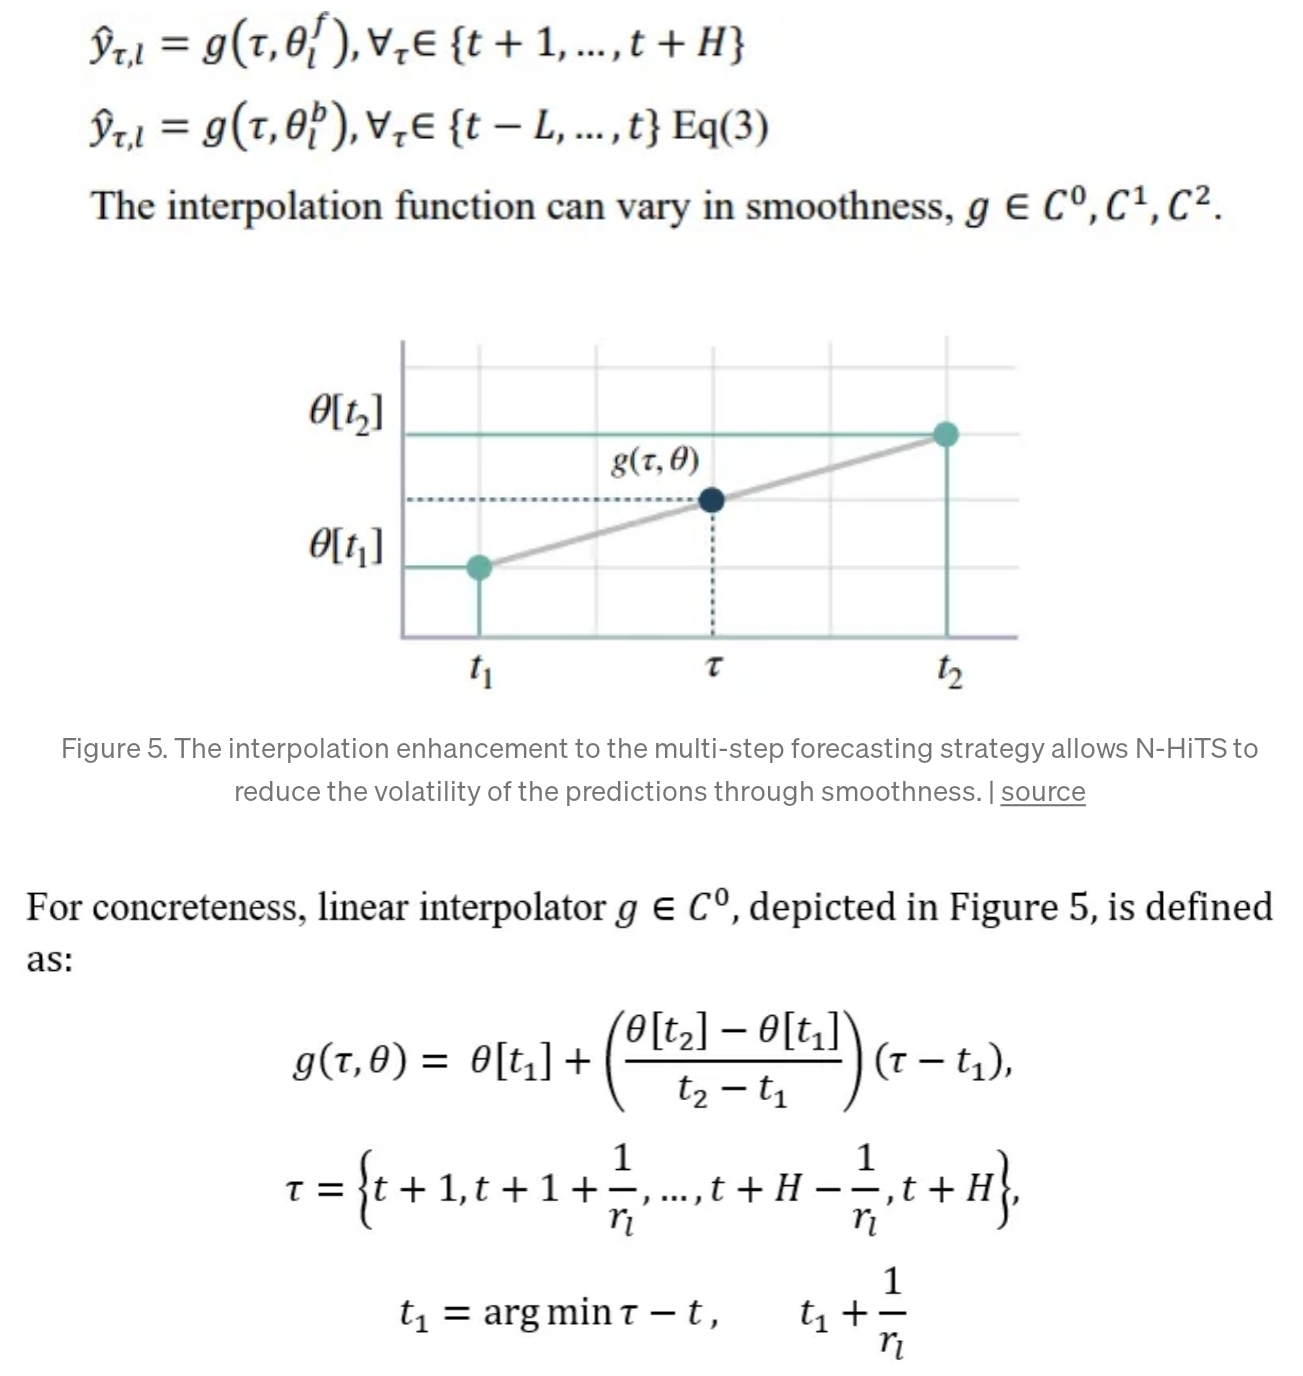

표현비율(expressiveness ratio)를 각 블록들에 동일하거나 적절한 정도로 할당하고(broadcasting), 블록들의 출력을 합산함으로써 계층적 보간을 수행한다.

즉, 각 블록들이 점들을 찍으면, 이걸 보간해서 연속적인 그래프를 만들어낸다고 볼 수 있다.

stack 별로 동일한 시간 단위를 보고 있다고 대략적으로 생각할 수 있다, 이걸 계층적으로 더 큰 트렌드에서 작은 추세로 내려간다고 생각할 수 있다.

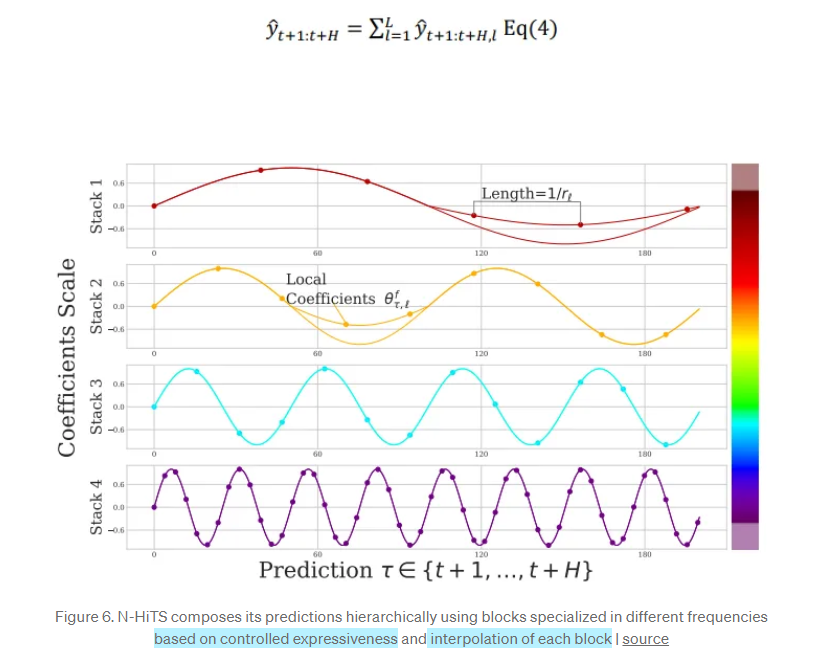

expressiveness ratio는 보간할 점들의 특정 시간 단위를 나타낸다고 볼 수 있고, 이를 적절히 활용하기 위해서는 표현 비율을 지수적으로 늘리거나, 주별, 일별 등 정해져 있는 시간적 주기를 활용하는 것이 좋다.

backcast residual, 즉 현재를 기준으로 과거를 예측해서 발생하는 오차도 고려해서 새로 학습한다.

아래 식 참고:

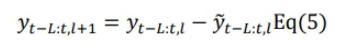

# 모델 결과

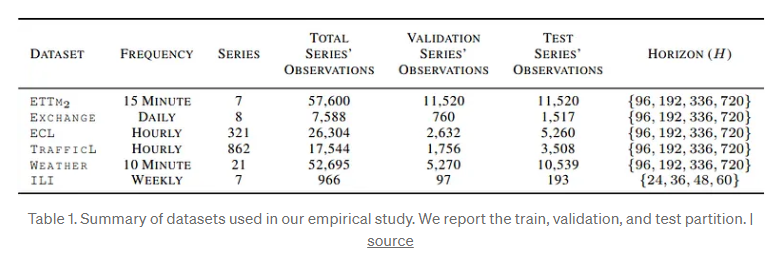

## 다른 시계열 모델들과의 성능 비교

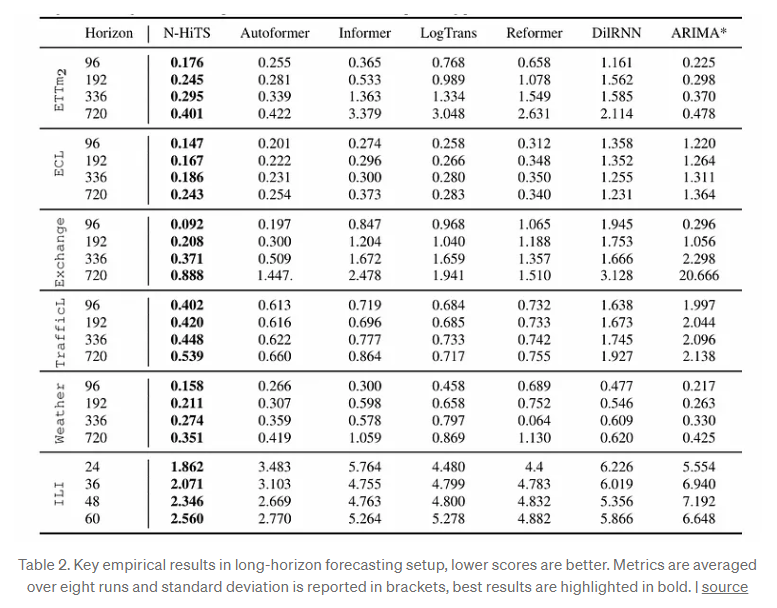

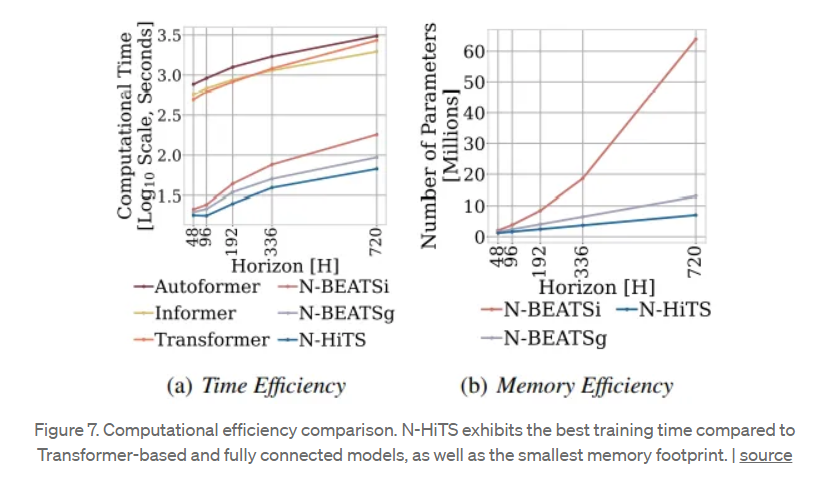

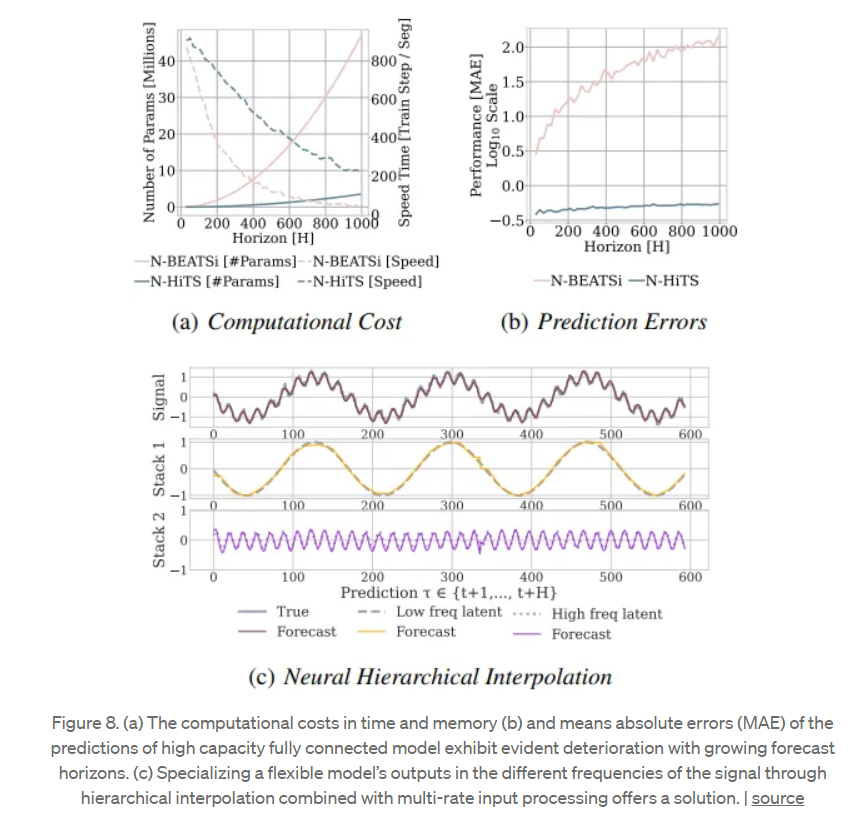

# 결론

NHiTS가 다른 비교 대상이된는 모델들보다 정확도와 효율성 면에서 뛰어나다는 것을 확인할 수 있다.

# 애플 데이터에 적용

## 모델 제대로 정의

In [ ]:
!pip install gluonts yfinance torch pandas numpy matplotlib

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import yfinance as yf
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from functools import partial

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim

class _NHITSBlock(nn.Module):
    def __init__(self, n_time_in: int, n_time_out: int, n_x: int,
                 n_s: int, n_s_hidden: int, n_theta: int, n_theta_hidden: list,
                 n_pool_kernel_size: int, pooling_mode: str, basis: nn.Module,
                 n_layers: int, batch_normalization: bool, dropout_prob: float, activation: str):
        super().__init__()

        # Pooling layer configuration
        assert pooling_mode in ['max', 'average']
        n_time_in_pooled = int(np.ceil(n_time_in / n_pool_kernel_size))

        if n_s == 0:
            n_s_hidden = 0
        n_theta_hidden = [n_time_in_pooled + (n_time_in + n_time_out) * n_x + n_s_hidden] + n_theta_hidden

        self.n_time_in = n_time_in
        self.n_time_out = n_time_out
        self.n_s = n_s
        self.n_s_hidden = n_s_hidden
        self.n_x = n_x
        self.n_pool_kernel_size = n_pool_kernel_size
        self.batch_normalization = batch_normalization
        self.dropout_prob = dropout_prob

        activ = getattr(nn, activation)()

        if pooling_mode == 'max':
            self.pooling_layer = nn.MaxPool1d(kernel_size=self.n_pool_kernel_size, stride=self.n_pool_kernel_size, ceil_mode=True)
        elif pooling_mode == 'average':
            self.pooling_layer = nn.AvgPool1d(kernel_size=self.n_pool_kernel_size, stride=self.n_pool_kernel_size, ceil_mode=True)

        hidden_layers = []
        for i in range(n_layers):
            hidden_layers.append(nn.Linear(in_features=n_theta_hidden[i], out_features=n_theta_hidden[i + 1]))
            hidden_layers.append(activ)

            if self.batch_normalization:
                hidden_layers.append(nn.BatchNorm1d(num_features=n_theta_hidden[i + 1]))

            if self.dropout_prob > 0:
                hidden_layers.append(nn.Dropout(p=self.dropout_prob))

        output_layer = [nn.Linear(in_features=n_theta_hidden[-1], out_features=n_theta)]
        layers = hidden_layers + output_layer

        if (self.n_s > 0) and (self.n_s_hidden > 0):
            self.static_encoder = nn.Linear(in_features=n_s, out_features=n_s_hidden)
        self.layers = nn.Sequential(*layers)
        self.basis = basis

    def forward(self, insample_y: torch.Tensor, insample_x_t: torch.Tensor,
                outsample_x_t: torch.Tensor, x_s: torch.Tensor) -> torch.Tensor:
        insample_y = insample_y.unsqueeze(1)
        insample_y = self.pooling_layer(insample_y)
        insample_y = insample_y.squeeze(1)

        batch_size = len(insample_y)
        if self.n_x > 0:
            insample_y = torch.cat((insample_y, insample_x_t.reshape(batch_size, -1)), 1)
            insample_y = torch.cat((insample_y, outsample_x_t.reshape(batch_size, -1)), 1)

        if (self.n_s > 0) and (self.n_s_hidden > 0):
            x_s = self.static_encoder(x_s)
            insample_y = torch.cat((insample_y, x_s), 1)

        theta = self.layers(insample_y)
        backcast, forecast = self.basis(theta, insample_x_t, outsample_x_t)

        return backcast, forecast


def create_stack(stack_types, n_blocks,
                 n_time_in, n_time_out,
                 n_x, n_x_hidden, n_s, n_s_hidden,
                 n_layers, n_theta_hidden,
                 n_pool_kernel_size, n_freq_downsample, pooling_mode,
                 batch_normalization, dropout_prob_theta,
                 activation, shared_weights, initialization):

        block_list = []

        for i in range(len(stack_types)):
            for block_id in range(n_blocks[i]):

                # Batch norm only for the first block
                batch_normalization_block = (len(block_list) == 0) and batch_normalization

                # Shared weights
                if shared_weights and block_id > 0:
                    nhits_block = block_list[-1]
                else:
                    if stack_types[i] == 'identity':
                        n_theta = (n_time_in + max(n_time_out // n_freq_downsample[i], 1))
                        basis = IdentityBasis(backcast_size=n_time_in,
                                              forecast_size=n_time_out,
                                              interpolation_mode='linear')
                    else:
                        raise ValueError(f'Block type {stack_types[i]} not found!')

                    nhits_block = _NHITSBlock(n_time_in=n_time_in,
                                              n_time_out=n_time_out,
                                              n_x=n_x,
                                              n_s=n_s,
                                              n_s_hidden=n_s_hidden,
                                              n_theta=n_theta,
                                              n_theta_hidden=n_theta_hidden[i],
                                              n_pool_kernel_size=n_pool_kernel_size[i],
                                              pooling_mode=pooling_mode,
                                              basis=basis,
                                              n_layers=n_layers[i],
                                              batch_normalization=batch_normalization_block,
                                              dropout_prob=dropout_prob_theta,
                                              activation=activation)

            init_function = partial(init_weights, initialization=initialization)
            nhits_block.layers.apply(init_function)
            block_list.append(nhits_block)
        return block_list

# Placeholder basis function
class IdentityBasis(nn.Module):
    def __init__(self, backcast_size, forecast_size, interpolation_mode):
        super().__init__()
        self.backcast_size = backcast_size
        self.forecast_size = forecast_size

    def forward(self, theta, insample_x_t, outsample_x_t):
        return theta[:, :self.backcast_size], theta[:, self.backcast_size:]

# Example weight initialization function
def init_weights(m, initialization):
    if isinstance(m, nn.Linear):
        if initialization == 'xavier':
            nn.init.xavier_uniform_(m.weight)
        elif initialization == 'he':
            nn.init.kaiming_uniform_(m.weight)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)


# 데이터

In [ ]:
import yfinance as yf
import pandas as pd

# Fetch stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')
data = data[['Close']]

# Split the data into train and test sets (80% train, 20% test)
split_index = int(0.8 * len(data))
train_data = data[:split_index]
test_data = data[split_index:]

# Create sequences for supervised learning
def create_sequences(data, n_time_in, n_time_out):
    xs, ys = [], []
    for i in range(len(data) - n_time_in - n_time_out):
        x = data[i:i + n_time_in]
        y = data[i + n_time_in:i + n_time_in + n_time_out]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Prepare training and testing data
n_time_in = 60
n_time_out = 30

X_train, y_train = create_sequences(train_data['Close'].values, n_time_in, n_time_out)
X_test, y_test = create_sequences(test_data['Close'].values, n_time_in, n_time_out)

# Convert to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

# Create DataLoader for training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)


[*********************100%%**********************]  1 of 1 completed


## 모델 생성

In [ ]:
# Define model parameters
stack_types = ['identity']
n_blocks = [3]  # Number of blocks in each stack
n_theta_hidden = [[128, 128, 128], [128, 128, 128], [128, 128, 128]]  # Layers in each block
n_layers = [3, 3, 3]  # Number of layers per block
n_pool_kernel_size = [2, 2, 2]  # Pooling kernel size
n_freq_downsample = [1, 1, 1]
batch_normalization = True
dropout_prob_theta = 0.2
activation = 'LeakyReLU'
shared_weights = False
initialization = 'xavier'

# Create the stack of N-HiTS blocks
model_blocks = create_stack(stack_types, n_blocks, n_time_in, n_time_out, 0, 0, 0, 0,
                            n_layers, n_theta_hidden, n_pool_kernel_size, n_freq_downsample,
                            'max', batch_normalization, dropout_prob_theta, activation, shared_weights, initialization)

# Define the full model as a sequence of stacked blocks
class NHITSModel(nn.Module):
    def __init__(self, blocks):
        super().__init__()
        self.blocks = nn.ModuleList(blocks)

    def forward(self, insample_y, insample_x_t, outsample_x_t, x_s):
        forecast = 0
        for block in self.blocks:
            backcast, block_forecast = block(insample_y, insample_x_t, outsample_x_t, x_s)
            insample_y = insample_y - backcast  # Residual connection
            forecast = forecast + block_forecast
        return forecast

# Instantiate the full model
model = NHITSModel(model_blocks)


# 모델 train

In [ ]:
# Training setup
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

# Training loop
epochs = 20
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch_x, batch_y in train_dataloader:
        optimizer.zero_grad()
        forecast = model(batch_x, torch.zeros_like(batch_x), torch.zeros_like(batch_x), None)
        loss = loss_fn(forecast, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_dataloader)}')


Epoch 1/20, Loss: 30.247863153868085
Epoch 2/20, Loss: 25.793053832235216
Epoch 3/20, Loss: 27.358321479604214
Epoch 4/20, Loss: 28.053369630741166
Epoch 5/20, Loss: 24.381061046938353
Epoch 6/20, Loss: 29.798174652872206
Epoch 7/20, Loss: 23.541019415553613
Epoch 8/20, Loss: 25.600676922858515
Epoch 9/20, Loss: 24.55795045442219
Epoch 10/20, Loss: 26.304630490797983
Epoch 11/20, Loss: 26.787899693356284
Epoch 12/20, Loss: 25.767845298670515
Epoch 13/20, Loss: 27.14052085635028
Epoch 14/20, Loss: 23.746328384061403
Epoch 15/20, Loss: 30.169956925549084
Epoch 16/20, Loss: 26.28143752979327
Epoch 17/20, Loss: 26.383093169972867
Epoch 18/20, Loss: 26.157371092446244
Epoch 19/20, Loss: 23.93206561366214
Epoch 20/20, Loss: 23.39986534360089


# 모델 평가 및 시각화

In [ ]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    forecast = model(X_test_tensor, torch.zeros_like(X_test_tensor), torch.zeros_like(X_test_tensor), None)

# Convert forecast to numpy for comparison and error calculations
forecast_np = forecast.numpy()

# Calculate the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test[:, -1], forecast_np[:, -1])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test[:, -1], forecast_np[:, -1])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate the Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = np.finfo(np.float32).eps  # Small epsilon to avoid division by zero
    y_true = np.where(y_true == 0, epsilon, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test[:, -1], forecast_np[:, -1])
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Calculate the Error Area (Total Area of Difference)
error_area = np.sum(np.abs(y_test[:, -1] - forecast_np[:, -1]))
print(f'Total Area of Difference (Error Area): {error_area}')


Mean Absolute Error (MAE): 10.320672242831339
Mean Squared Error (MSE): 175.28173649879923
Root Mean Squared Error (RMSE): 13.239400911627355
Mean Absolute Percentage Error (MAPE): 7.14%
Total Area of Difference (Error Area): 5831.179817199707


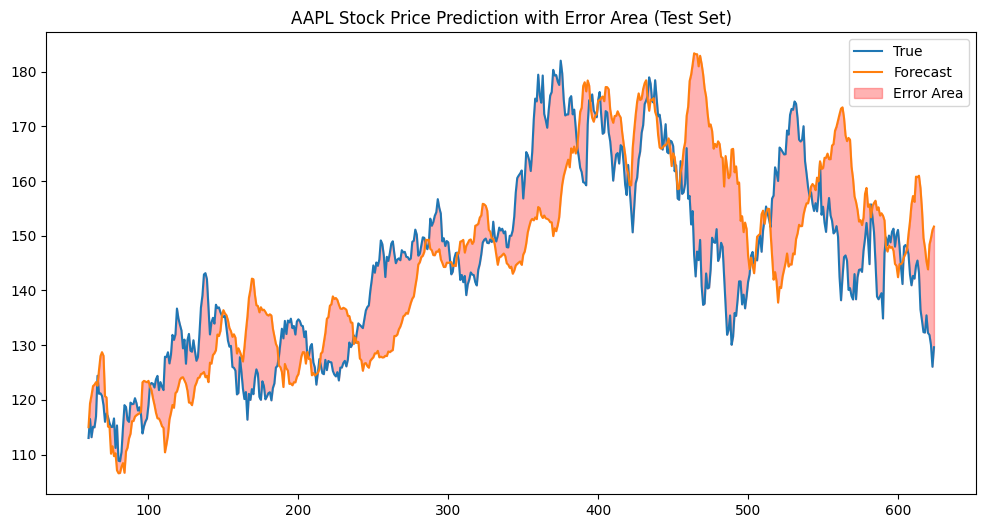

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(test_data))[n_time_in:n_time_in + len(y_test)], y_test[:, -1], label='True')
plt.plot(range(len(test_data))[n_time_in:n_time_in + len(forecast_np)], forecast_np[:, -1], label='Forecast')

# Fill the area of difference
plt.fill_between(range(len(test_data))[n_time_in:n_time_in + len(forecast_np)],
                 y_test[:, -1], forecast_np[:, -1], color='red', alpha=0.3, label='Error Area')

plt.legend()
plt.title(f'{ticker} Stock Price Prediction with Error Area (Test Set)')
plt.show()


In [ ]:
sharpe ratio